In [203]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np
import scipy as scp
from pylab import rcParams

In [58]:
our_columns = ['icethic_cea', 'iceconc','uice_ipa', 'vice_ipa','snowthic_cea']
df = pd.read_csv('/home/user/Documents/NSS_lab/arctic_TimeSeries_analysis/arctic_results/ts_features.csv', header = None)
df.columns = our_columns
times = pd.date_range('2012-01-01', periods=len(df.index), freq='1h')
df.index = times

<Figure size 432x288 with 0 Axes>

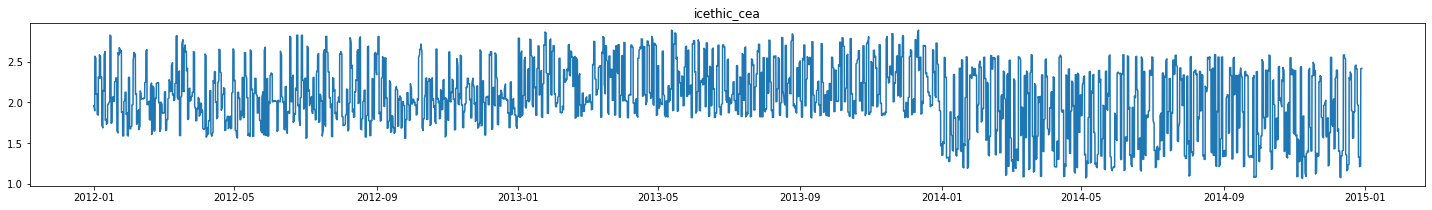

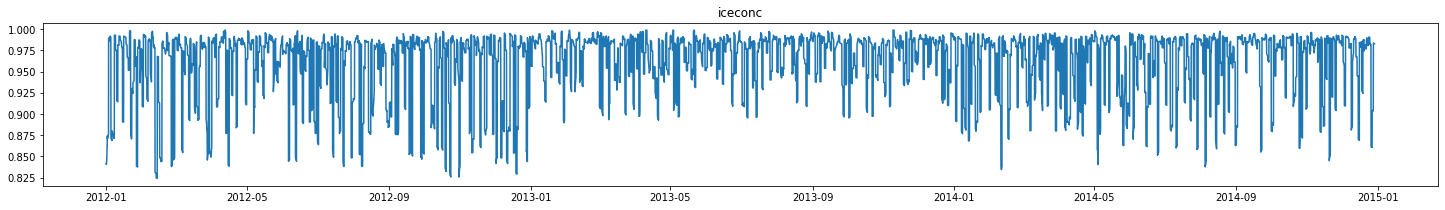

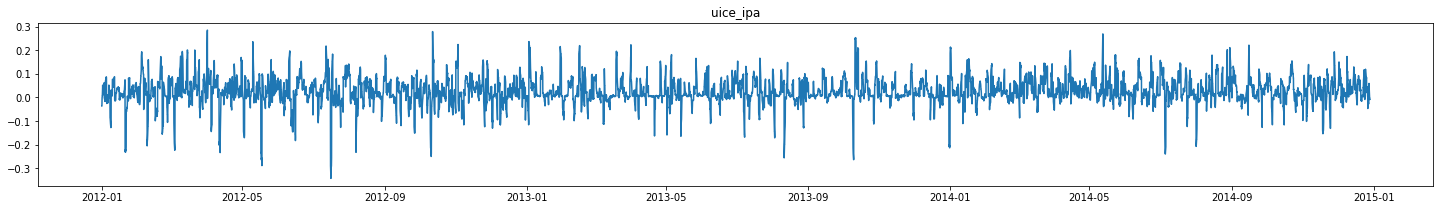

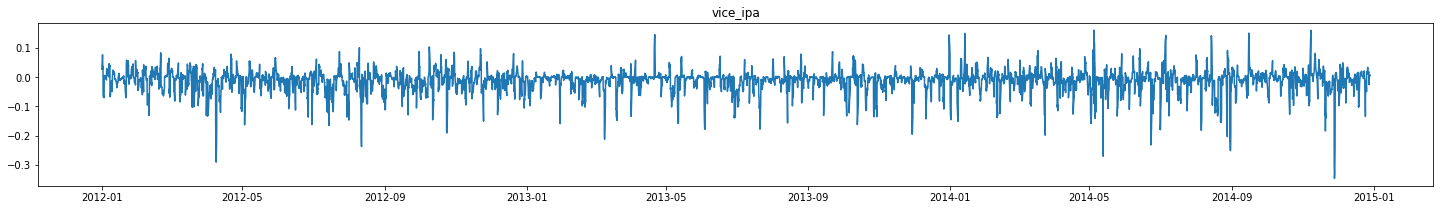

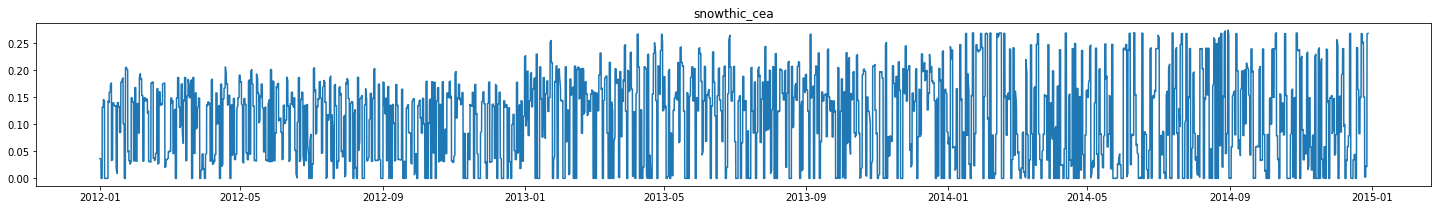

In [22]:
plt.figure()
for column in df.columns:
    plt.subplots(figsize=(25, 3))
    plt.plot(df[column])
    plt.title(column)

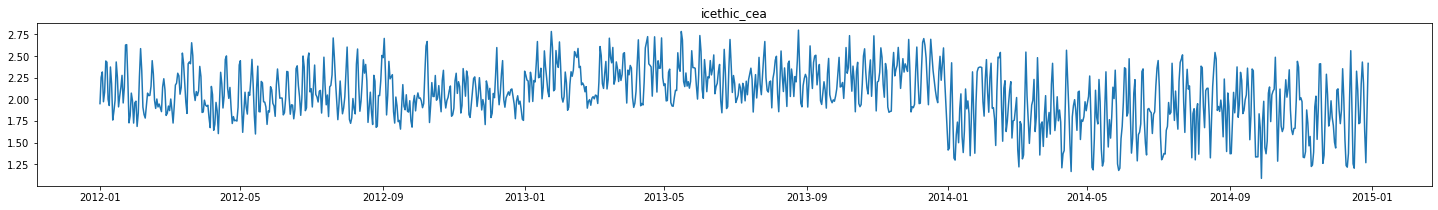

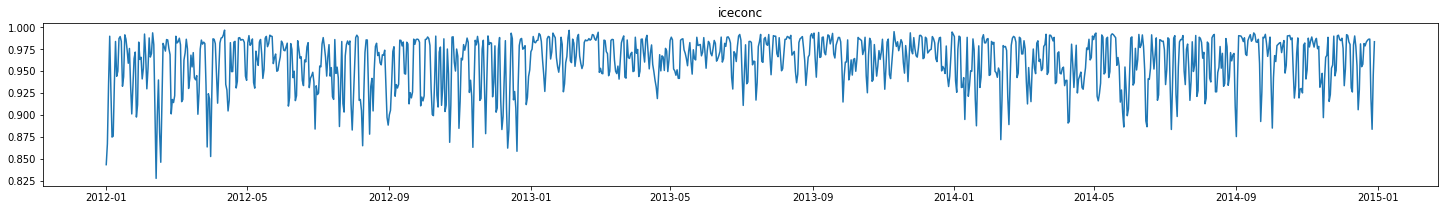

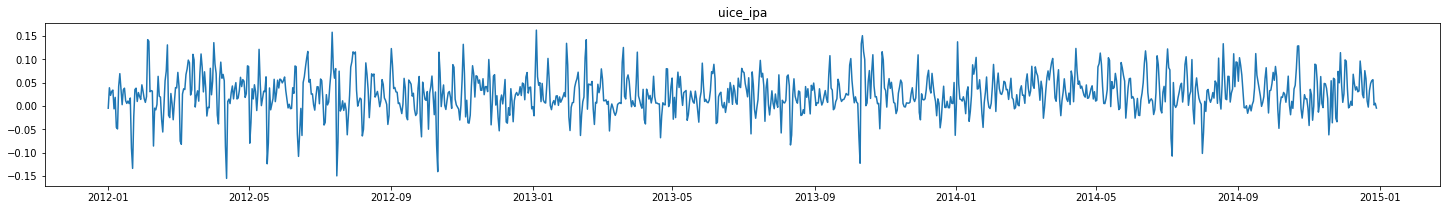

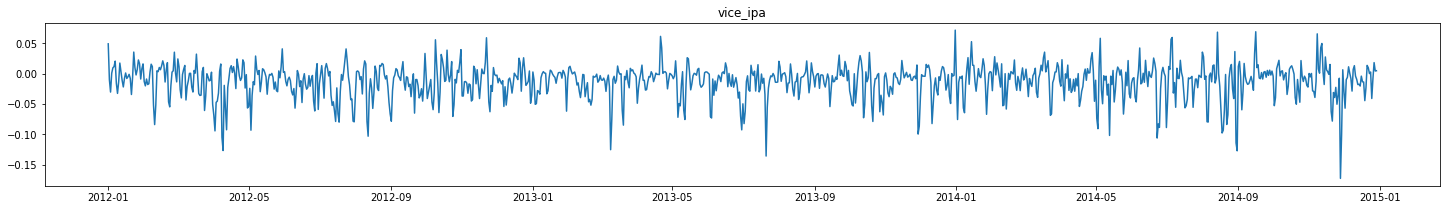

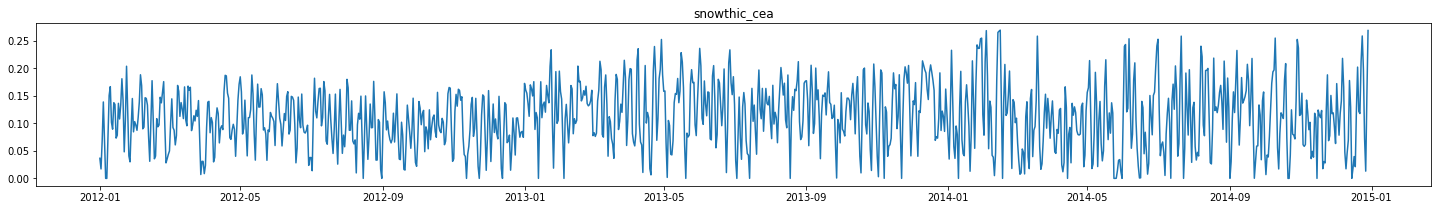

In [84]:
df['dt'] = df.index
df['dt']=df['dt'].dt.round('1d')
dc = {column: 'mean' for column in our_columns}
df_daily = df.groupby('dt').agg(dc)
for column in df_daily.columns:
    plt.subplots(figsize=(25, 3))
    plt.plot(df_daily[column])
    plt.title(column)

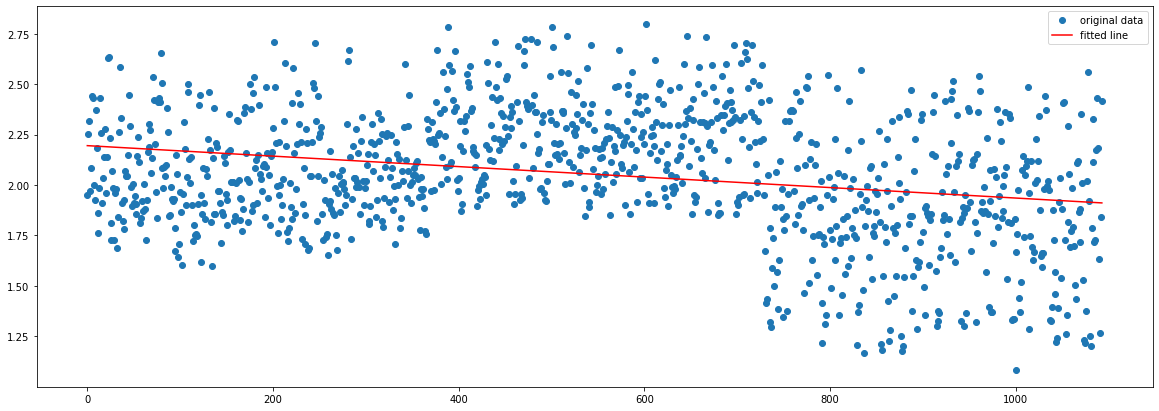

ADF Statistic: -4.030899705356476
p-value: 0.001
Series is Stationary
KPSS Test Statistics: 0.9952117223881187
p-value: 0.01
Series is not Stationary


In [204]:
y = df_daily['icethic_cea']
x = np.array([x for x in range(len(y.values))])
lin_reg = scp.stats.linregress(x,y)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, lin_reg.intercept + lin_reg.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()


# ADF Test
result = adfuller(df_daily['icethic_cea'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {round(result[1],3)}')

if result[1] > 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')


# KPSS Test
stats, p, lags, critical_values = kpss(df_daily['icethic_cea'], 'ct')
print(f'KPSS Test Statistics: {stats}')
print(f'p-value: {round(p, 3)}')

if p<0.05:
      print('Series is not Stationary')
else:
      print('Series is Stationary')

Dickey-Fuller test: p=0.001257
Student test: p=0.000000


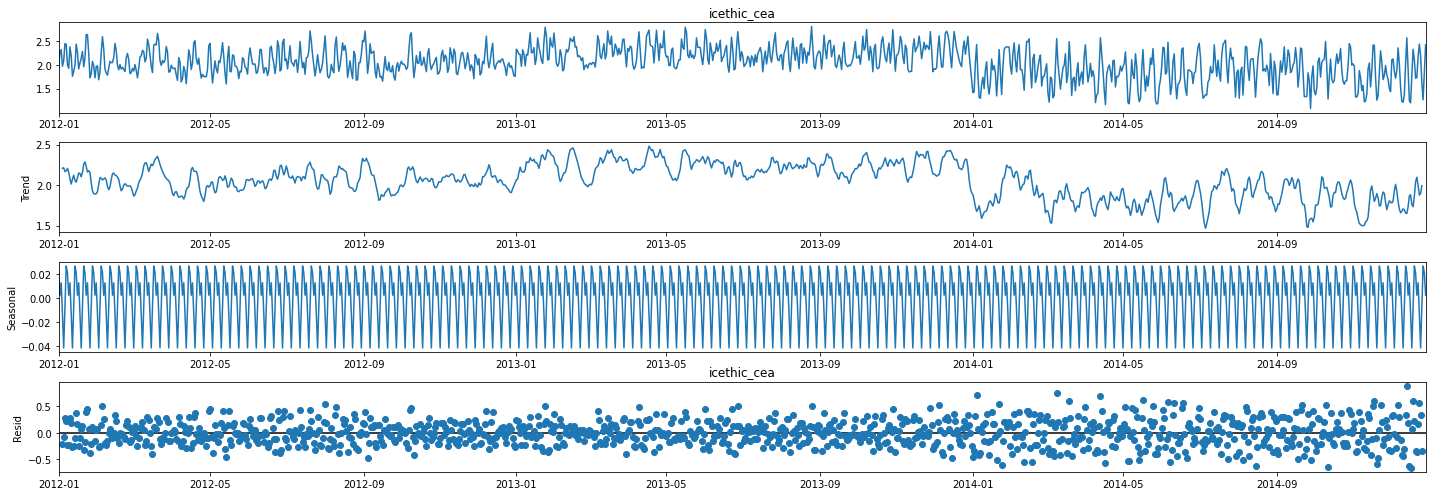

Dickey-Fuller test: p=0.000290
Student test: p=0.000000


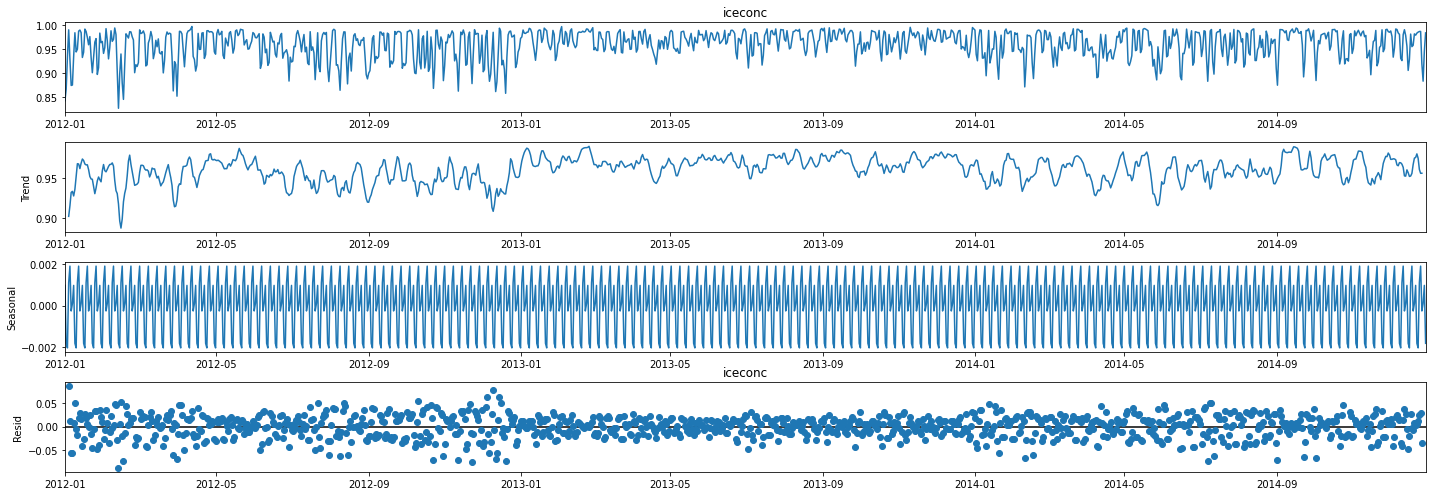

Dickey-Fuller test: p=0.000000
Student test: p=0.000000


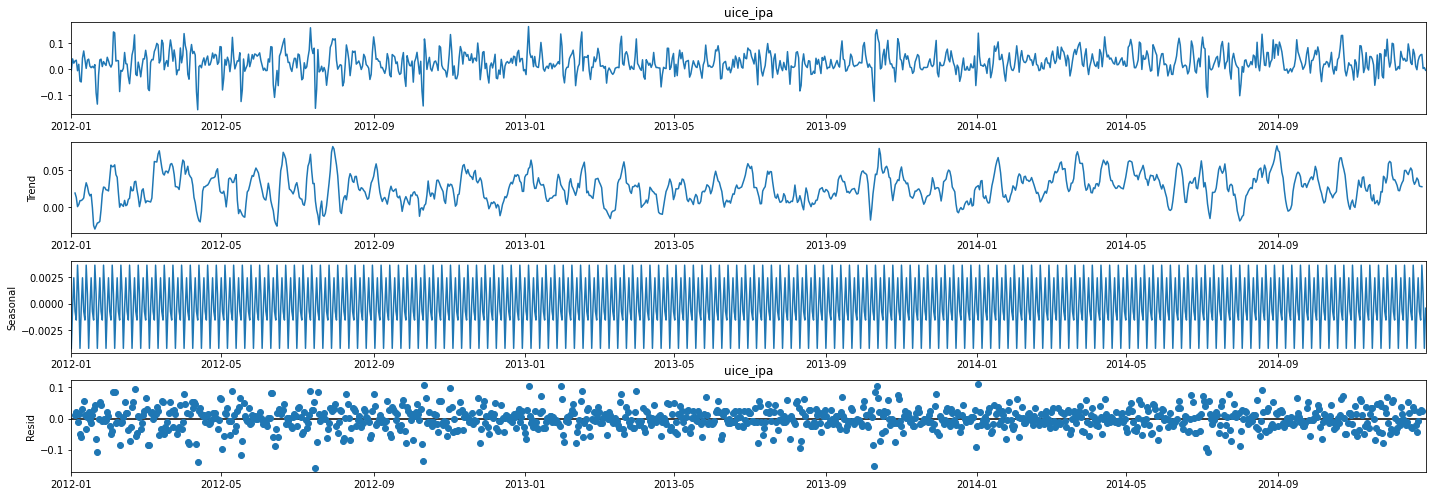

Dickey-Fuller test: p=0.000000
Student test: p=0.000000


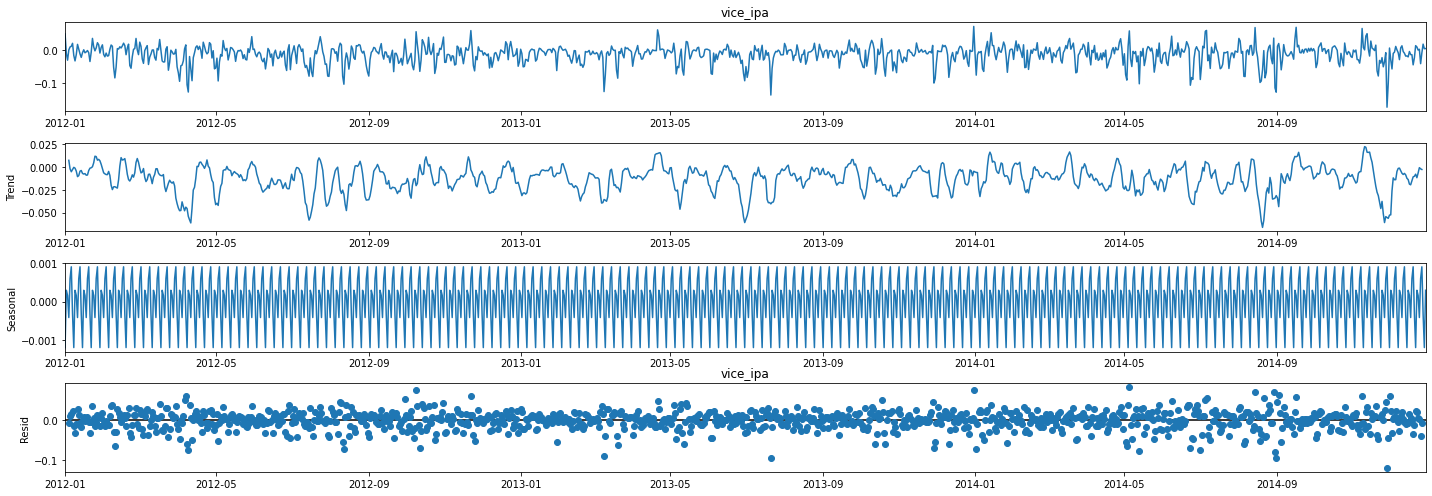

Dickey-Fuller test: p=0.000000
Student test: p=0.000000


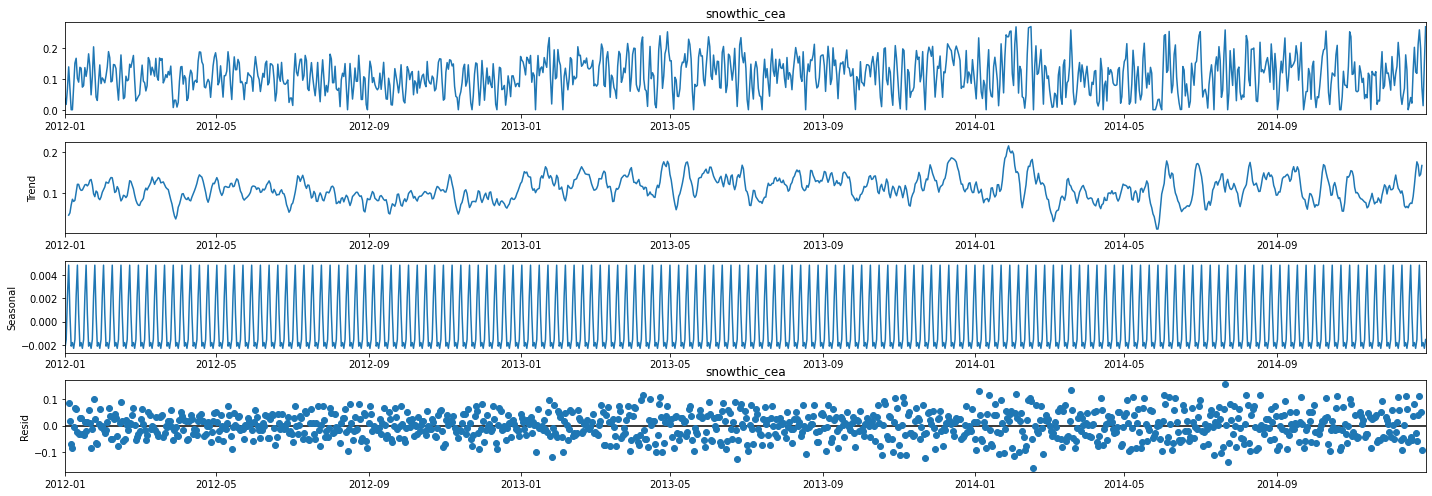

In [95]:
rcParams['figure.figsize'] = 20, 7
for column in df_daily.columns:
    print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_daily[column])[1])
    print("Student test: p=%f" % scp.stats.ttest_1samp(df_daily[column], 0)[1])
    sm.tsa.seasonal_decompose(df_daily[column]).plot()
    plt.title(column)
    plt.show()

Dickey-Fuller test: p=0.000003
Student test: p=0.000000


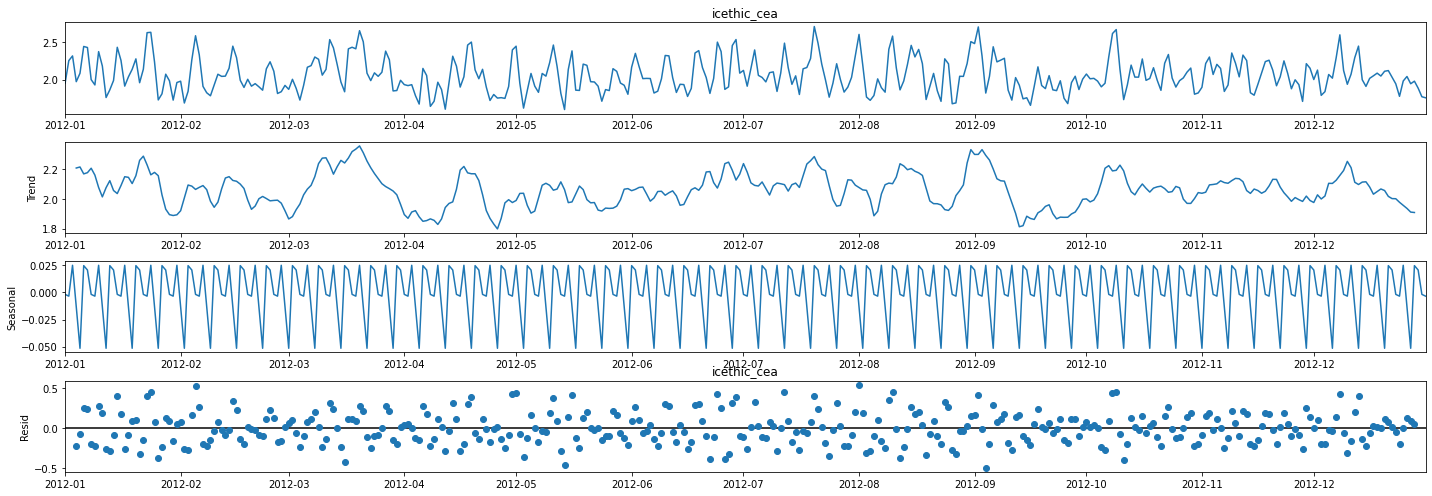

Dickey-Fuller test: p=0.000001
Student test: p=0.000000


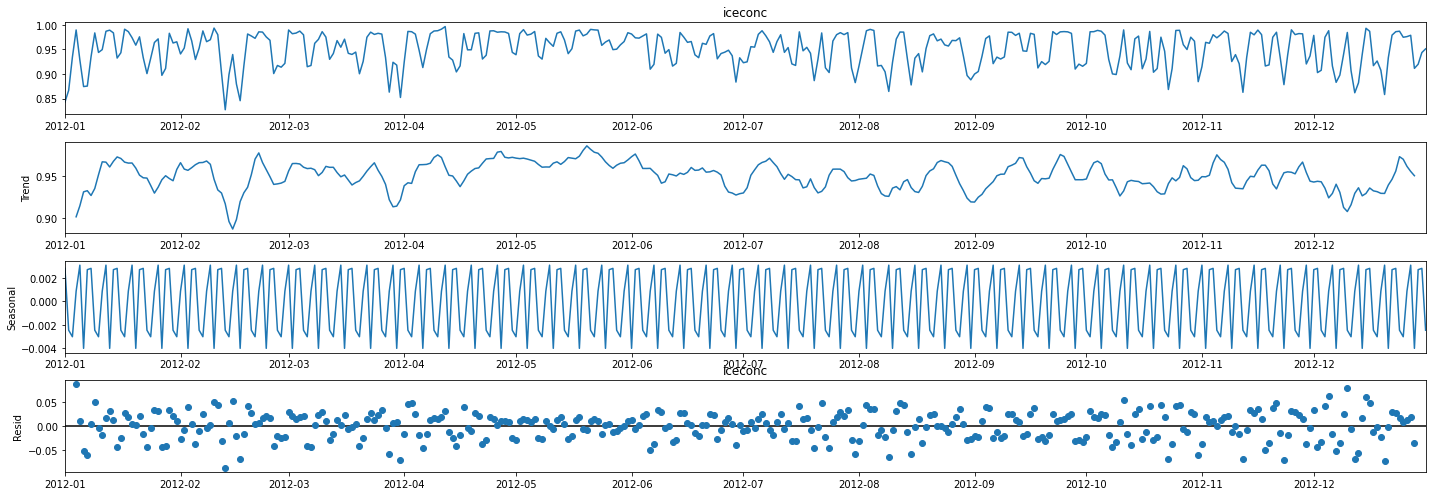

Dickey-Fuller test: p=0.000000
Student test: p=0.000000


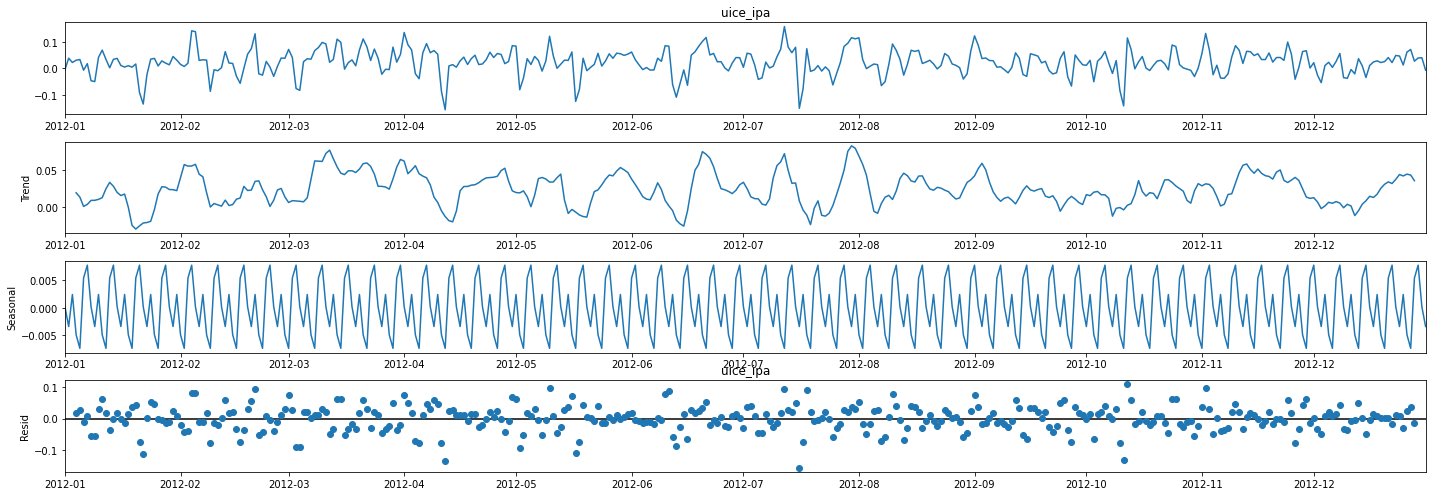

Dickey-Fuller test: p=0.000000
Student test: p=0.000000


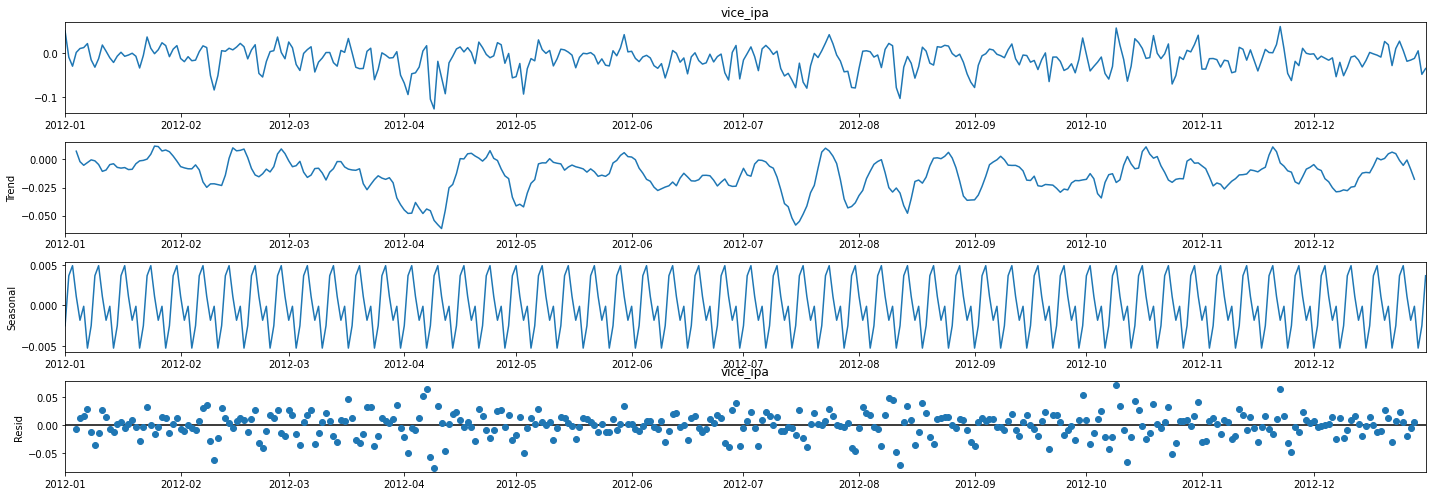

Dickey-Fuller test: p=0.000028
Student test: p=0.000000


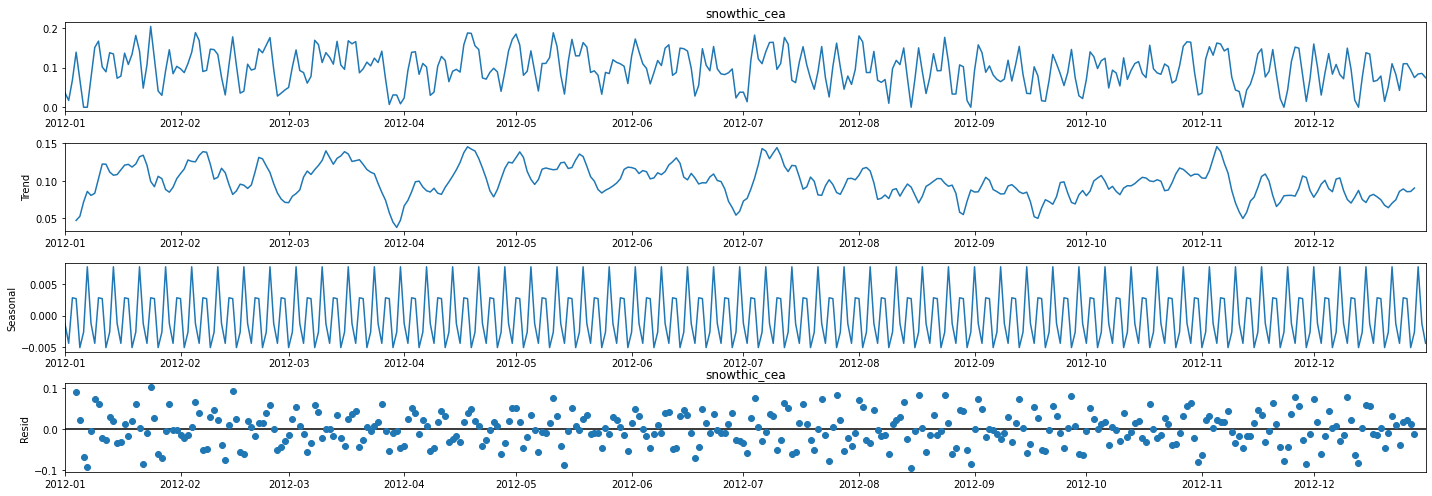

In [104]:
one_year = df_daily.iloc[:366, :].copy()
for column in one_year.columns:
    print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(one_year[column])[1])
    print("Student test: p=%f" % scp.stats.ttest_1samp(one_year[column], 0)[1])
    sm.tsa.seasonal_decompose(one_year[column]).plot()
    plt.title(column)
    plt.show()

In [108]:
df

,icethic_cea,iceconc,uice_ipa,vice_ipa,snowthic_cea,dt
2012-01-01 00:00:00,1.955260,0.841304,-0.036264,0.027235,0.036751,2012-01-01
2012-01-01 01:00:00,1.955260,0.841304,-0.036264,0.027235,0.036751,2012-01-01
2012-01-01 02:00:00,1.956049,0.840655,-0.019191,0.042246,0.036714,2012-01-01
2012-01-01 03:00:00,1.955356,0.840756,-0.010818,0.044456,0.036672,2012-01-01
2012-01-01 04:00:00,1.955356,0.840756,-0.010818,0.044456,0.036672,2012-01-01
...,...,...,...,...,...,...
2014-12-28 19:00:00,2.415442,0.983384,-0.004576,0.004375,0.268757,2014-12-29
2014-12-28 20:00:00,2.415763,0.983200,-0.006507,0.005553,0.268829,2014-12-29
2014-12-28 21:00:00,2.415963,0.983121,-0.007235,0.006178,0.268868,2014-12-29
2014-12-28 22:00:00,2.415963,0.983121,-0.007235,0.006178,0.268868,2014-12-29


Dickey-Fuller test: p=0.003506
Student test: p=0.000000


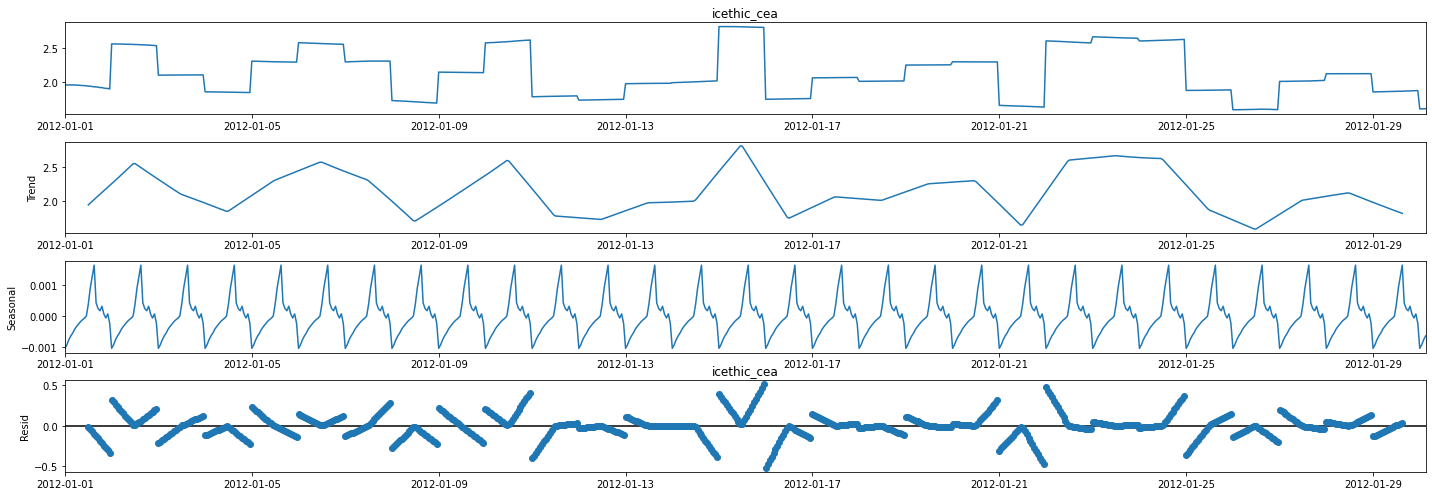

Dickey-Fuller test: p=0.002620
Student test: p=0.000000


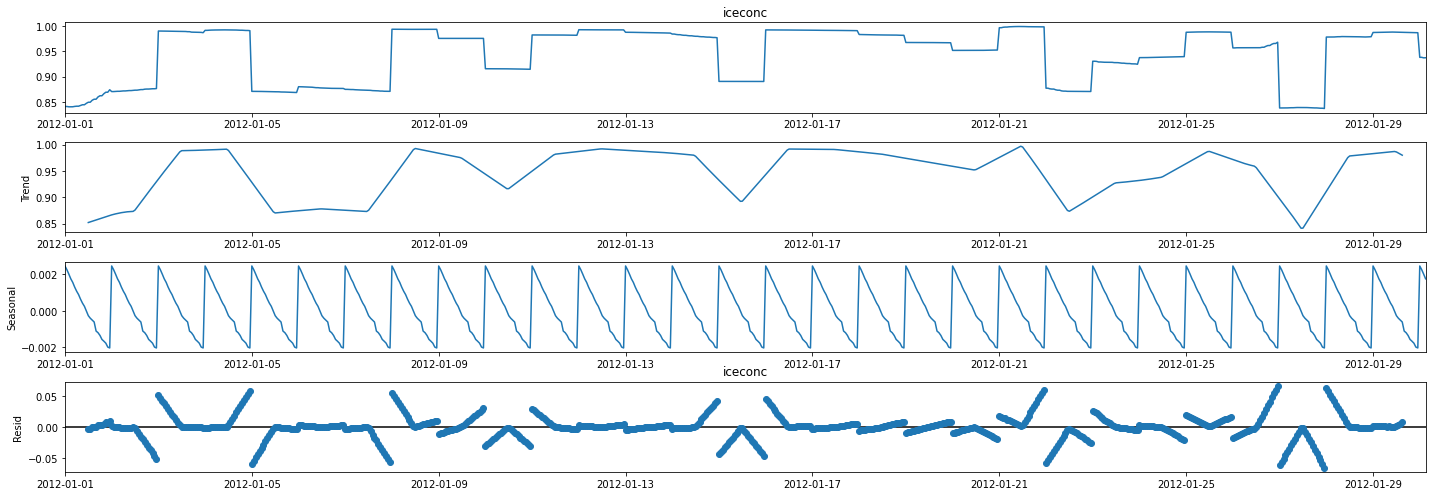

Dickey-Fuller test: p=0.001422
Student test: p=0.000335


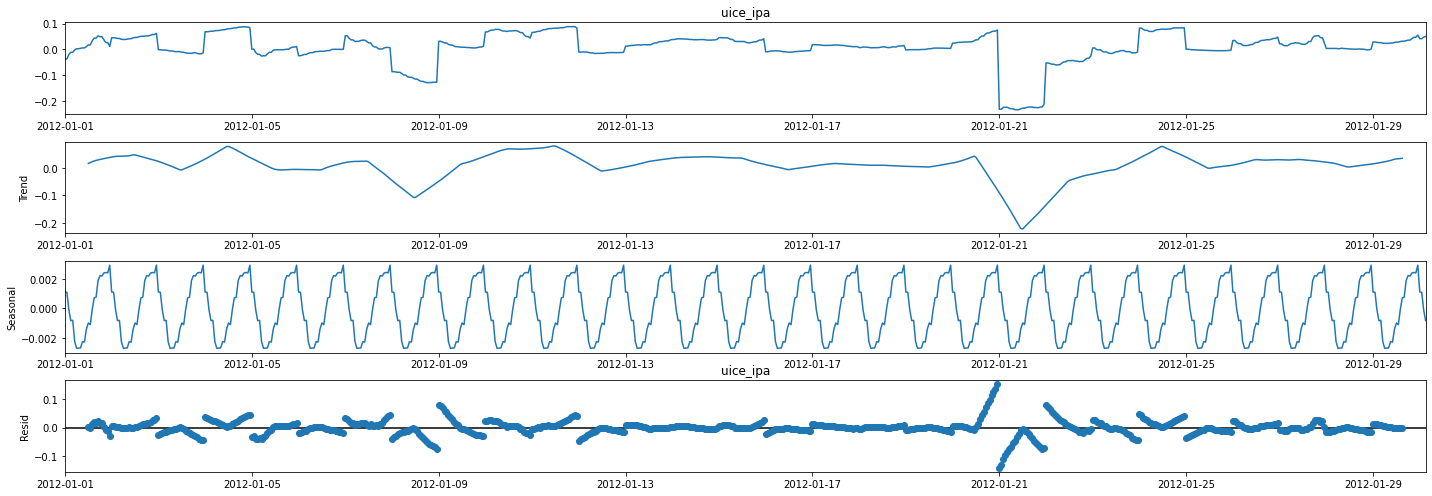

Dickey-Fuller test: p=0.000436
Student test: p=0.260978


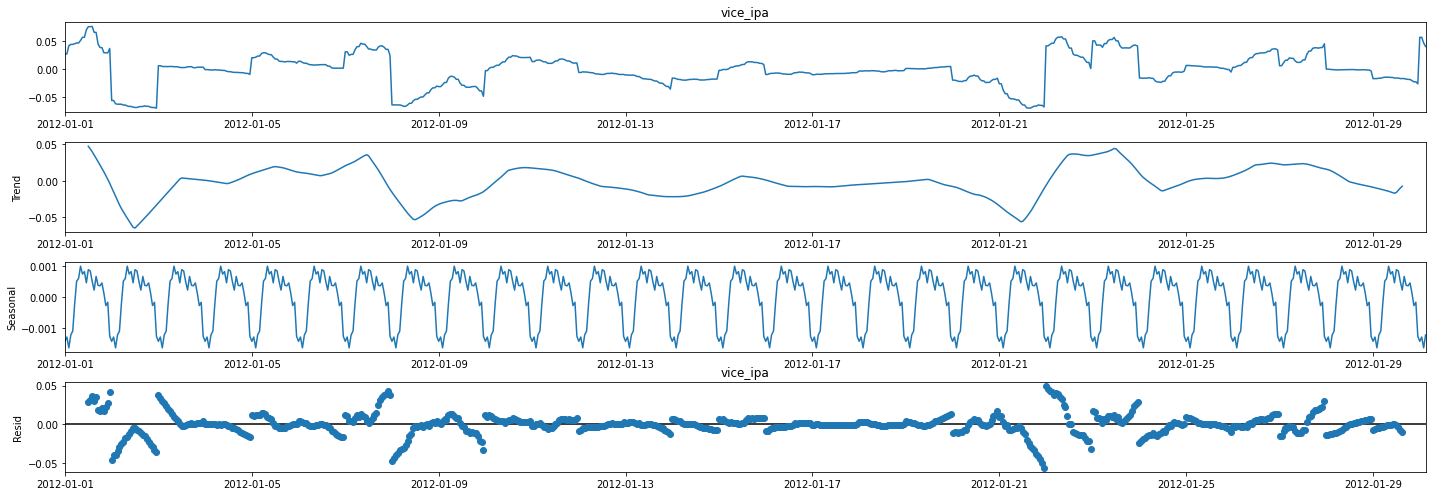

Dickey-Fuller test: p=0.005952
Student test: p=0.000000


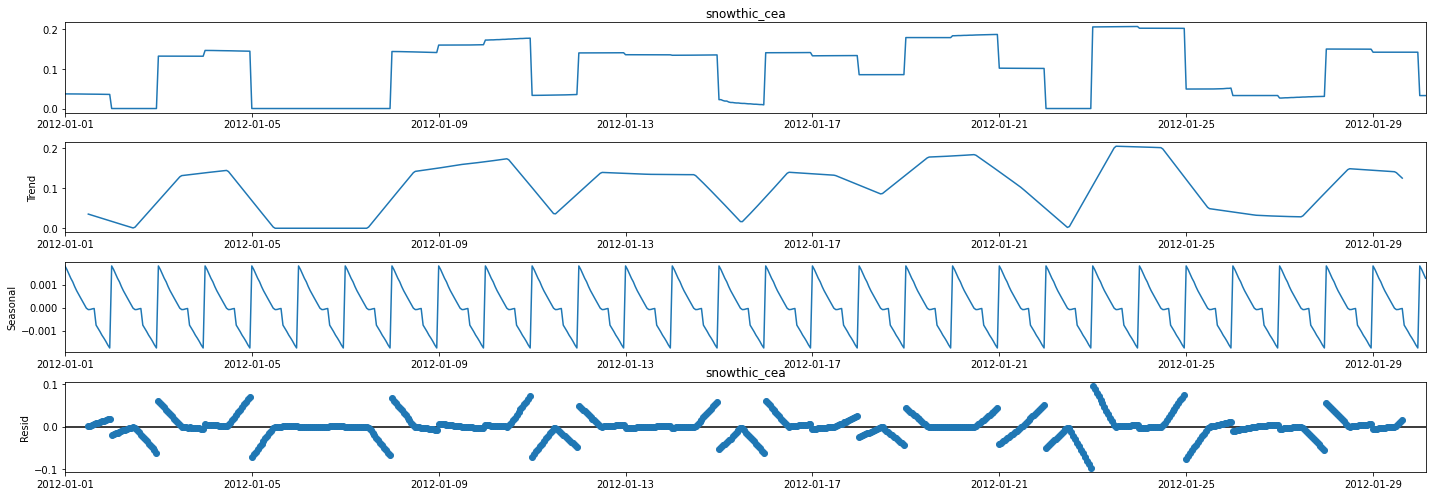

In [112]:
one_month = df[our_columns].iloc[:700, :].copy()
for column in one_month.columns:
    print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(one_month[column])[1])
    print("Student test: p=%f" % scp.stats.ttest_1samp(one_month[column], 0)[1])
    sm.tsa.seasonal_decompose(one_month[column]).plot()
    plt.title(column)
    plt.show()